==============================================================================================
## Practicum 4: Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

In this laboratory we will treat the following main topics:

1) Template matching
    - Normalized Cross-correlation
    - Application to object (eye) detection 

2) Image Descriptors: "Sliding window" and HOG image descriptor
   - Application to object (car) detection

3) Image matching (recognition by correspondance) based on feature extraction (ORB)
    - Application to object (logo) detection
    
In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

All code should be commented in English. Answers of the questions and comments on the exercises should be given in English too.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

## 4.1 Template matching

4.1.1 Given the image 'einstein.png' and the template 'eye.png', detect the location of the template in the image comparing the use of:
- euclidean distance (hint: norm() in numpy.linalg).
- normalized cross-correlation (hint: match_template() of skimage.feature).

Hint: you can take as an example, the template matching on the [coin exercise](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_template.html#sphx-glr-auto-examples-features-detection-plot-template-py) in skimage.
Don't forget to normalize the images (having pixel values between [0,1]) before comparing them.

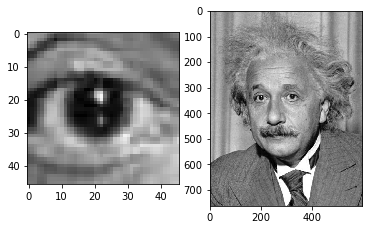

In [57]:
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

plt.subplot(1,2,1)
eye=io.imread('./images/eye.png')
plt.imshow(eye)

plt.subplot(1,2,2)
einstein=io.imread('./images/einstein.png')
plt.imshow(einstein)

plt.show()

In [3]:
''' Visualization and template matching functions definition '''


' Visualization and template matching functions definition '

In [58]:
from numpy.linalg import norm
from skimage.feature import match_template
from skimage.color import rgb2gray
from skimage.transform import resize
from ipywidgets import FloatProgress
from IPython.display import display


einstein = rgb2gray(einstein)
eye = rgb2gray(eye)
#normalization
einstein = (einstein - einstein.min())*((1-0)/(einstein.max()-einstein.min()))+0
eye = (eye - eye.min())*((1-0)/(eye.max()-eye.min()))+0 

In [60]:
#euclidean distance 
matrix_target = np.zeros(eye.shape, dtype="float")
max_min = 10000000
min_pos = None

f = FloatProgress(min=0, max=einstein.shape[0])#progress bar to see the loading
display(f)#show the bar progress

vector_max_min = []

for k in range(einstein.shape[0]):
    for l in range(einstein.shape[1]):
        if (k+eye.shape[0] < einstein.shape[0]) and (l+eye.shape[1] <  einstein.shape[1]):
            matrix_target = blomndeseinstein[k:k+eye.shape[0],l:l+eye.shape[1]]
            matrix_result = eye - matrix_target 
            norm_matrix_result = norm(matrix_result)
            if (norm_matrix_result < max_min):
                max_min = norm_matrix_result
                min_pos = (k,l)
            vector_max_min.append(norm_matrix_result)
    k += eye.shape[0]
    f.value = k
    
print (max_min,min_pos)

2.29027584057 (316, 178)


C:\Users\mat.aules\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


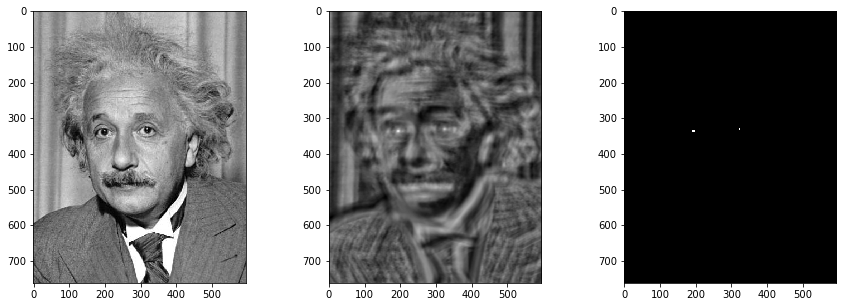

In [63]:
#normalized cross-correlation 
result2 = match_template(einstein, eye)
result2 = resize(result2, (int(einstein.shape[0]), int(einstein.shape[1])))
detect2 = result2 > 0.55

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(einstein,cmap="gray")
ax[1].imshow(result2,cmap="gray")
ax[2].imshow(detect2,cmap="gray")

plt.show()

4.1.2 How does the result of the template matching change if the image changes its contrast (for example if you make it clearer or darker)? To this purpose, read the images "einstein_br.png" and "einstein_mask.png".

Visualize the normalized cross-correlation image between the template and the image as well as this very same image in a binarized form in order to show where is the minimal distance between the template and the image. 
* How does the minimum distance between the template and the image change? 
* What are the minimal distance pixels in the correlation images? 
* What are the distances between the template and the image around the eyes of the image? 

Use titles of the figures to explain what is displayed.


C:\Users\vitor\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


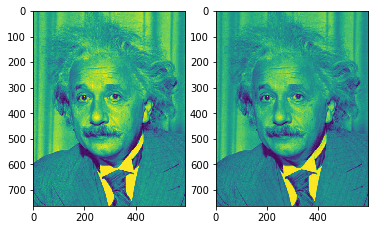

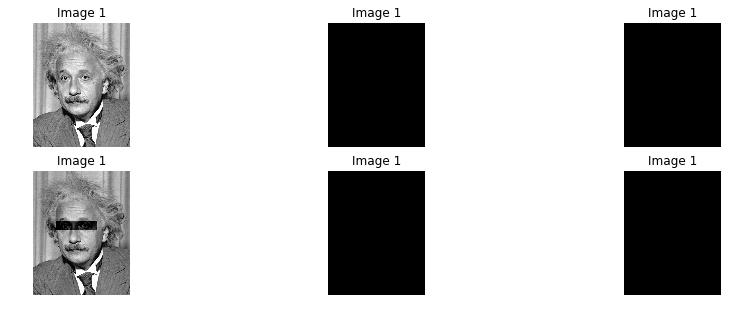

In [24]:
plt.subplot(1,2,1)
einstein_br=io.imread('./images/einstein_br.png')
plt.imshow(eye)

plt.subplot(1,2,2)
einstein_mask=io.imread('./images/einstein_mask.png')
plt.imshow(einstein)

einstein_br = rgb2gray(einstein_br)
einstein_mask = rgb2gray(einstein_mask)

#normalization
einstein_br = (einstein_br - einstein_br.min())*((1-0)/(einstein_br.max()-einstein_br.min()))+0
einstein_mask = (einstein_mask - einstein_mask.min())*((1-0)/(einstein_mask.max()-einstein_mask.min()))+0 

result_macth_template_br = match_template(einstein_br, eye)
result_resized_br = resize(result_macth_template_br, (int(einstein.shape[0]), int(einstein.shape[1])))
detection_br = result_resized_br > 0.25

result_macth_template_mask = match_template(einstein_mask, eye)
result_resized_mask = resize(result_macth_template_mask, (int(einstein.shape[0]), int(einstein.shape[1])))
detection_mask = result_resized_mask > 0.25

fig, ax = plt.subplots(2, 3, figsize=(15, 5))

ax[0][0].imshow(einstein_br,cmap="gray")
ax[0][0].axis('off')
ax[0][0].set_title("Image 1")

ax[0][1].imshow(result_resized_br,cmap="gray")
ax[0][1].axis('off')
ax[0][1].set_title("Image 1")

ax[0][2].imshow(detection_br,cmap="gray")
ax[0][2].axis('off')
ax[0][2].set_title("Image 1")

ax[1][0].imshow(einstein_mask ,cmap="gray")
ax[1][0].axis('off')
ax[1][0].set_title("Image 1")

ax[1][1].imshow(result_resized_mask,cmap="gray")
ax[1][1].axis('off')
ax[1][1].set_title("Image 1")

ax[1][2].imshow(detection_mask,cmap="gray")
ax[1][2].axis('off')
ax[1][2].set_title("Image 1")

plt.show()

4.1.3 How does the result of the template matching changes if instead the template is the one that changes its contrast (for example if you make it clearer or darker)? To this purpose, use the 'eye_br.png' template.

C:\Users\vitor\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


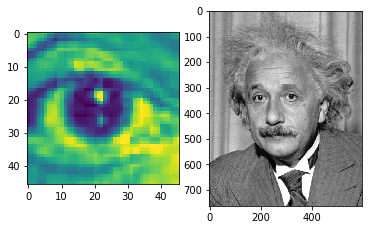

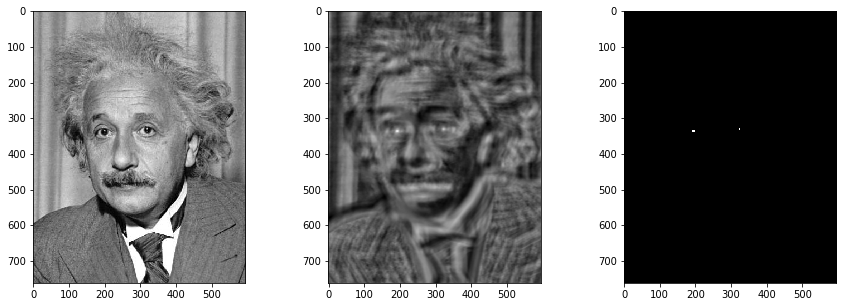

In [23]:
plt.subplot(1,2,1)
eye_br = io.imread('./images/eye_br.png')
plt.imshow(eye_br)

plt.subplot(1,2,2)
einstein=io.imread('./images/einstein.png')
plt.imshow(einstein)

einstein = rgb2gray(einstein)
eye_br = rgb2gray(eye_br)
#normalization
einstein = (einstein - einstein.min())*((1-0)/(einstein.max()-einstein.min()))+0
eye_br = (eye_br - eye_br.min())*((1-0)/(eye_br.max()-eye_br.min()))+0 

result2 = match_template(einstein, eye_br)
result2 = resize(result2, (int(einstein.shape[0]), int(einstein.shape[1])))
detect2 = result2 > 0.55

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(einstein,cmap="gray")
ax[1].imshow(result2,cmap="gray")
ax[2].imshow(detect2,cmap="gray")

plt.show()

4.1.4 Check how the result changes if the template is rotated. Visualize the template and its rotation by 10º, 15º and 20º. Obtain again the template matching using the Euclidean distance and normalized cross-correlation.
Help: use the function rotate() in skimage.transform

Comment what is the template matching process, what advantages and disadvantages it has, how sensible is to image deformation in photometric and spatial dimensions, what parameters it has and which measure for image comparisons works better.

In [27]:
eye = io.imread('./images/eye_br.png')
einstein=io.imread('./images/einstein.png')

einstein = rgb2gray(einstein)
eye = rgb2gray(eye)

#normalization
einstein = (einstein - einstein.min())*((1-0)/(einstein.max()-einstein.min()))+0
eye = (eye - eye.min())*((1-0)/(eye.max()-eye.min()))+0 

rotationdegrees = 5
eye_rotated_5 = tf.rotate(eye, rotationdegrees)

rotationdegrees = 10
eye_rotated_10 = tf.rotate(eye, rotationdegrees)

rotationdegrees = 20
eye_rotated_20 = tf.rotate(eye, rotationdegrees)

result_eye_rotated_5 = match_template(einstein, eye_rotated_5)
eye_resized_5 = resize(result_eye_rotated_5 , (int(einstein.shape[0]), int(einstein.shape[1])))
detect_eye_rotated_5 = eye_resized_5 > 0.55

result_eye_rotated_10 = match_template(einstein, eye_rotated_10)
eye_resized_10 = resize(result_eye_rotated_10, (int(einstein.shape[0]), int(einstein.shape[1])))
detect_eye_rotated_10 = eye_resized_10 > 0.55

result_eye_rotated_20 = match_template(einstein, eye_rotated_20)
eye_resized_20 = resize(result_eye_rotated_20, (int(einstein.shape[0]), int(einstein.shape[1])))
detect_eye_rotated_20 = eye_resized_20 > 0.55

fig, ax = plt.subplots(3, 3, figsize=(15, 5))

ax[0][0].imshow(eye_rotated_5,cmap="gray")
ax[0][0].axis('off')
ax[0][0].set_title("Image 1")

ax[0][1].imshow(eye_resized_5,cmap="gray")
ax[0][1].axis('off')
ax[0][1].set_title("Image 1")

ax[0][2].imshow(detect_eye_rotated_5,cmap="gray")
ax[0][2].axis('off')
ax[0][2].set_title("Image 1")

ax[1][0].imshow(eye_rotated_10,cmap="gray")
ax[1][0].axis('off')
ax[1][0].set_title("Image 1")

ax[1][1].imshow(eye_resized_10,cmap="gray")
ax[1][1].axis('off')
ax[1][1].set_title("Image 1")

ax[1][2].imshow(detect_eye_rotated_10,cmap="gray")
ax[1][2].axis('off')
ax[1][2].set_title("Image 1")

ax[2][0].imshow(eye_rotated_20,cmap="gray")
ax[2][0].axis('off')
ax[2][0].set_title("Image 1")

ax[2][1].imshow(eye_resized_20,cmap="gray")
ax[2][1].axis('off')
ax[2][1].set_title("Image 1")

ax[2][2].imshow(detect_eye_rotated_20,cmap="gray")
ax[2][2].axis('off')
ax[2][2].set_title("Image 1")

plt.show()

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

# 4.2 Histogram of Oriented Gradients


The Histogram of Oriented Gradients (HOG) feature descriptor is classical image descriptor for object detection.

Given the image 'car_template.png' and the folder 'cars', apply the HOG descriptor in order to detect where there is a car in the images in the folder 'car'. To this purpose, apply the "sliding window" technique. The algorithm can be:

a) Read the car template ('car_template.png') and obtain its HOG descriptor. Visualize it. [Help](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py) 

b) Read images from the folder "car", slide a window on each image, obtain the HOG descriptor and compare to the HOG descriptor of the car template. 

c) Visualize the location in the image that is the most similar to the car template. What distance will you use to compare both HOG descriptors of the car template and the image region? Compare if there is any difference in their results. 

d) Compute in how many images the cars were detected correctly and discuss the algorithm failures. What do you think can be the reasons for the failure?

Hint: the HOG detector function is in the skimage.feature library. 

If you want to accelerate algorithm execution, you can apply the sliding window with a step of X pixels (e.g. X=5).

Discuss what is the HOG descriptor, what are the parameters of the algorithm, which are the optimal values for the car detection testing several values of the parameters up to your criterion. Do you see any advantages of the HOG-based object detector compared to the template-based object detection? (The answer should be up to 10-15 lines).

In [2]:
from skimage import io
from matplotlib import pyplot as plt
import numpy as np

from numpy.linalg import norm
from skimage.feature import match_template, hog
from skimage.color import rgb2gray
from skimage.transform import resize
from ipywidgets import FloatProgress
from IPython.display import display
from skimage.exposure import rescale_intensity

C:\Users\mat.aules\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


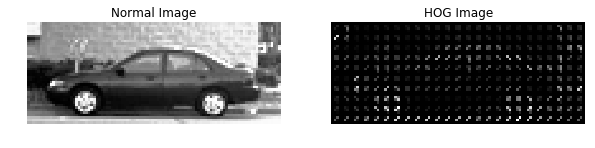

In [4]:
''' Visualization and HOG functions definition '''

"""
    1- rgb2gray
    2- sliding window
    3- HOG
    4- dotproduct numpy.dot(hog_tmeplate, hog_region) #hog_region the parts of image usado
    5- max
"""

car_template = io.imread('./images/car_template.png')
car_template = rgb2gray(car_template)

fd, template = hog(car_template,pixels_per_cell=(4, 4),
                    cells_per_block=(10,10), visualise=True)
hog_image_rescaled = rescale_intensity(template, in_range=(0, 0.02))

fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))

ax1.axis('off')
ax1.imshow(car_template, cmap="gray")
ax1.set_title("Normal Image")
ax1.set_adjustable('box-forced')

ax2.axis('off')
ax2.imshow(template, cmap="gray")
ax2.set_title("HOG Image")
ax2.set_adjustable('box-forced')

plt.show()

In [11]:
car_collection = io.ImageCollection('./images/TestImages/*')

f = FloatProgress(min=0,max=len(car_collection))#progress bar to see the loading
display(f)#show the bar progress
max_min = 10000000
min_pos = None

vector_of_mins_max = []

for image, i in zip(car_collection, range(0,len(car_collection))):
    vector_max_min = []
    __,image_hog = hog(image,pixels_per_cell=(4, 4),
                    cells_per_block=(10,10), visualise=True)
    for k in range(image_hog.shape[0]):
        for l in range(image_hog.shape[1]):
            if (k+template.shape[0] < image_hog.shape[0]) and (l+template.shape[1] < image_hog.shape[1]):
                matrix_target = image_hog[k:k+template.shape[0],l:l+template.shape[1]]
                matrix_result = template - matrix_target 
                norm_matrix_result = norm(matrix_result)
                if (norm_matrix_result < max_min):
                    max_min = norm_matrix_result
                    min_pos = (k,l)
                vector_max_min.append(norm_matrix_result)
        k += template.shape[0]
    f.value = i
    vector_of_mins_max.append((image, vector_max_min[0],vector_max_min[1]))

40


C:\Users\mat.aules\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


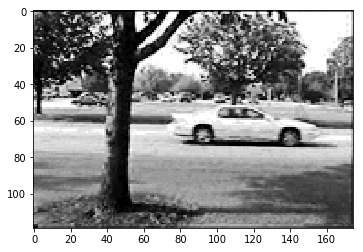

In [13]:
"""
i = (x, y)
car_collection[i]
"""
max_value = None

for i in vector_of_mins_max:
    value = i[1]
    if not max_value:
        max_value = value
        image = i[0]
    else:
        if max_value < value:
            max_value = value
            image = i[0]
            
plt.imshow(image,cmap='gray')
plt.show()



# 4.3 ORB feature detector and binary descriptor

Let us consider the problem of feature extraction that contains two subproblems: 
- feature location, 
- image feature description.

In theory classes, we saw two feature extraction methods: SIFT and ORB. Let us focus on ORB.

**4.3.1** Check if ORB is  scale and rotation invariant, a property that is very important for real-time applications.

**Hint:** `ORB` is a function within the module `skimage.feature`
                             
**Help**: We suggest to have a look at the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) how to compute the ORB descriptors and find the descriptors match. You can use the function match_descriptors from `skimage.feature` module in order to compute and show the similar detected descriptors of the given images. 

a) Detect the correspondences between the model image `starbucks.jpg` with the scene image `starbucks6.jpg`. You can adapt the code from the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) above. Define the algorithm in terms of functions in order to be able to apply it on different images. Comment the code in detail.

Hint: If the function plot_matches() gives you an error you can use the plot_matches_aux() at the end of this file.

In [10]:
''' Visualization and ORB functions definition '''
"""
 1- dect_ext = ORB(N)
 2- rgb2gray
 3- desc_extr detect-anddiextract(img)
 4- desc1 = desc_extr descriptors
 5- match_descriptors(desc1, desc2)
 6- plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
"""
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from numpy.linalg import norm
from skimage.feature import match_template, ORB,match_descriptors
from skimage.color import rgb2gray
from skimage.transform import resize
from ipywidgets import FloatProgress
from IPython.display import display
from skimage import transform as tf

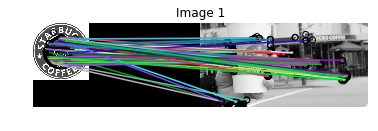

In [5]:
starbucks = io.imread('./images/starbucks.jpg')
starbucks_scene = io.imread('./images/starbucks6.jpg')

starbucks_scene = rgb2gray(starbucks_scene)
starbucks = rgb2gray(starbucks)

descriptor_extractor = ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(starbucks)
keypoints_original = descriptor_extractor.keypoints
descriptors_original = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(starbucks_scene)
keypoints_match = descriptor_extractor.keypoints
descriptors_match = descriptor_extractor.descriptors

matches = match_descriptors(descriptors_original, descriptors_match, cross_check=True)

fig, ax = plt.subplots(nrows=1, ncols=1)

plot_matches_aux(ax, starbucks, starbucks_scene, keypoints_original, keypoints_match, matches,
                keypoints_color='k', matches_color=None, only_matches=False)
ax.axis('off')
ax.set_title("Image 1")

plt.show()

b) Repeate the experiment comparing the "starbucks.jpg" image as a model, and showing its matches to all Starbucks images, sorting them based on their similarity to the model. Comment when the algorithm works best. 

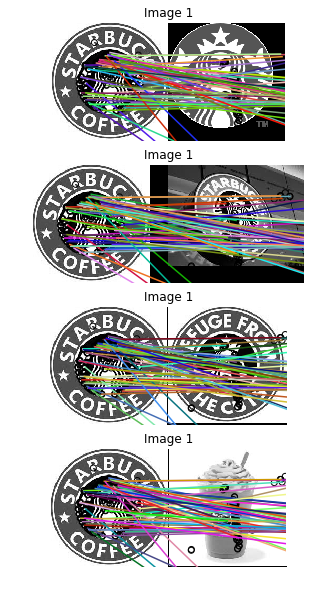

In [11]:
starbucks2 = io.imread('./images/starbucks2.png')
starbucks4 = io.imread('./images/starbucks4.jpg')
starbucks5 = io.imread('./images/starbucks5.png')
starbucksCup = io.imread('./images/starbucksCup.jpg')

starbucks_2 = rgb2gray(starbucks2)
starbucks_4 = rgb2gray(starbucks4)
starbucks_5 = rgb2gray(starbucks5)
starbucks_cup = rgb2gray(starbucksCup)

descriptor_extractor = ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(starbucks_scene)
keypoints_2 = descriptor_extractor.keypoints
descriptors_2 = descriptor_extractor.descriptors

matches2 = match_descriptors(descriptors_original, descriptors_2, cross_check=True)

descriptor_extractor.detect_and_extract(starbucks_scene)
keypoints_4 = descriptor_extractor.keypoints
descriptors_4 = descriptor_extractor.descriptors

matches4 = match_descriptors(descriptors_original, descriptors_4, cross_check=True)

descriptor_extractor.detect_and_extract(starbucks_scene)
keypoints_5 = descriptor_extractor.keypoints
descriptors_5 = descriptor_extractor.descriptors

matches5 = match_descriptors(descriptors_original, descriptors_5, cross_check=True)

descriptor_extractor.detect_and_extract(starbucks_scene)
keypoints_cup = descriptor_extractor.keypoints
descriptors_cup = descriptor_extractor.descriptors

matchesCup = match_descriptors(descriptors_original, descriptors_cup, cross_check=True)

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 10))

plot_matches_aux(ax[0], starbucks, starbucks_2, keypoints_original, keypoints_2, matches2,
                keypoints_color='k', matches_color=None, only_matches=False)
ax[0].axis('off')
ax[0].set_title("Image 1")

plot_matches_aux(ax[1], starbucks, starbucks_4, keypoints_original, keypoints_4, matches4,
                keypoints_color='k', matches_color=None, only_matches=False)
ax[1].axis('off')
ax[1].set_title("Image 1")

plot_matches_aux(ax[2], starbucks, starbucks_5, keypoints_original, keypoints_5, matches5,
                keypoints_color='k', matches_color=None, only_matches=False)
ax[2].axis('off')
ax[2].set_title("Image 1")

plot_matches_aux(ax[3], starbucks, starbucks_cup, keypoints_original, keypoints_cup, matchesCup,
                keypoints_color='k', matches_color=None, only_matches=False)
ax[3].axis('off')
ax[3].set_title("Image 1")

plt.show()

c) Repeate the experiment in (b): 
- Changing the orientation of the model image by rotating it and comparing it with its original version. Help: you can use the rotate() function from skimage.transform 
- Change the scale and orientation of the scene image and compare it with the model image.

Help: To do so, you can use the function given below as example:

import transform as tf
rotationdegrees = 180
img_rotated = tf.rotate(image2transform, rotationdegrees)

or

tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img_transformed = tf.warp(image2transform, tform)

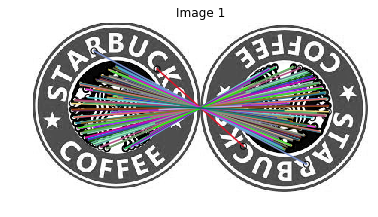

In [13]:
starbucks = io.imread('./images/starbucks.jpg')

starbucks = rgb2gray(starbucks)
rotationdegrees = 180 
img_rotated = tf.rotate(starbucks, rotationdegrees)

descriptor_extractor = ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(starbucks)
keypoints_original = descriptor_extractor.keypoints
descriptors_original = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img_rotated)
keypoints_img_rotated = descriptor_extractor.keypoints
descriptors_img_rotated = descriptor_extractor.descriptors

matches = match_descriptors(descriptors_original, descriptors_img_rotated, cross_check=True)

fig, ax = plt.subplots(nrows=1, ncols=1)

plot_matches_aux(ax, starbucks, img_rotated, keypoints_original, keypoints_img_rotated, matches,
                keypoints_color='k', matches_color=None, only_matches=False)
ax.axis('off')
ax.set_title("Image 1")

plt.show()

**Optional:** Repeate the experiment with a new group of images. You could use Coca-Cola advertisements or from another famous brand, easily to find on internet.



### Analysis of the applied techniques and results

- What are the advantages of the ORB object detection with respect to the HOG and template object detector?

- What would happen if you analyse an image that does not contain the Starbucks logo? 

- Could you think of ways of defining a quality measure for the correspondance between two images? (no need of implementing it) 

## Delivery

All code sould be commented in English. Answers of the questions should be given in English too.

Compressed file **P4_Student1_Student2.zip** that includes:
- The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used that are not provided in P1.zip.

**Deadline (Campus Virtual): November 21st, 11:00 p.m.** 

In [4]:
#Appendix: In case the plot_matches() function gives you some problems, you can use the following one:

from skimage.util import img_as_float
import numpy as np

def plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
    """Plot matched features.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Matches and image are drawn in this ax.
    image1 : (N, M [, 3]) array
        First grayscale or color image.
    image2 : (N, M [, 3]) array
        Second grayscale or color image.
    keypoints1 : (K1, 2) array
        First keypoint coordinates as ``(row, col)``.
    keypoints2 : (K2, 2) array
        Second keypoint coordinates as ``(row, col)``.
    matches : (Q, 2) array
        Indices of corresponding matches in first and second set of
        descriptors, where ``matches[:, 0]`` denote the indices in the first
        and ``matches[:, 1]`` the indices in the second set of descriptors.
    keypoints_color : matplotlib color, optional
        Color for keypoint locations.
    matches_color : matplotlib color, optional
        Color for lines which connect keypoint matches. By default the
        color is chosen randomly.
    only_matches : bool, optional
        Whether to only plot matches and not plot the keypoint locations.
    """

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]),
                '-', color=color)